In [2]:
import pyodbc
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
conn = pyodbc.connect('Driver={SQL Server};''Server=sqlcovid19.database.windows.net;''Database=DB_COVID_NINETEEN;''UID=datarangers;''PWD=data_rangers19')

In [4]:
query_covid = 'SELECT * FROM COUNTRY_COVID_DAILY_CASES'
query_country = 'SELECT * FROM COUNTRY'

In [5]:
df_data = pd.read_sql(query_covid,conn)
df_country = pd.read_sql(query_country,conn)

In [6]:
with conn:
    crs = conn.cursor()
    crs.close()

In [7]:
df_geral = pd.merge(df_data, df_country, left_on='ID_COUNTRY', right_on='ID')
df_geral.drop(['ID_x', 'ID_y', 'ISO2', 'SLUG'], axis = 1) 
df_geral = df_geral[['DATE','ID_COUNTRY', 'NAME', 'ID_CASE_TYPE', 'TOTAL_CASES']]
df_geral.head()

DATE  ID_COUNTRY     NAME  ID_CASE_TYPE  TOTAL_CASES
0  2020-01-22           1  Albania             1            0
1  2020-01-22           1  Albania             2            0
2  2020-02-01           1  Albania             1            0
3  2020-02-01           1  Albania             2            0
4  2020-02-11           1  Albania             1            0

In [8]:
df_geral['DATE'] = pd.to_datetime(df_geral['DATE'], infer_datetime_format=True)
df_geral.set_index('DATE', inplace=True)
df_geral

ID_COUNTRY                      NAME  ID_CASE_TYPE  TOTAL_CASES
DATE                                                                       
2020-01-22           1                   Albania             1            0
2020-01-22           1                   Albania             2            0
2020-02-01           1                   Albania             1            0
2020-02-01           1                   Albania             2            0
2020-02-11           1                   Albania             1            0
...                ...                       ...           ...          ...
2021-03-10         333  United States of America             2       529264
2021-03-11         333  United States of America             1     29286134
2021-03-11         333  United States of America             2       530821
2021-03-12         333  United States of America             1     29347338
2021-03-12         333  United States of America             2       532590

[23174 rows x 4 columns]

In [9]:
df_geral.sort_index(ascending=False, inplace=True)
df_geral

ID_COUNTRY                       NAME  ID_CASE_TYPE  TOTAL_CASES
DATE                                                                        
2021-03-12         333   United States of America             2       532590
2021-03-12          10  Taiwan, Republic of China             2           10
2021-03-12         239                     Angola             1        21265
2021-03-12         239                     Angola             2          519
2021-03-12         150            Solomon Islands             2            0
...                ...                        ...           ...          ...
2020-01-22         251  Iran, Islamic Republic of             1            0
2020-01-22         132                   Viet Nam             1            0
2020-01-22          45                    Belarus             2            0
2020-01-22          45                    Belarus             1            0
2020-01-22           1                    Albania             1            0

[23174 rows x 4 columns]

In [10]:
df_geral = df_geral.sort_values(by='TOTAL_CASES', ascending=False)
df_geral

ID_COUNTRY                      NAME  ID_CASE_TYPE  TOTAL_CASES
DATE                                                                       
2021-03-12         333  United States of America             1     29347338
2021-03-11         333  United States of America             1     29286134
2021-03-10         333  United States of America             1     29223730
2021-03-09         333  United States of America             1     29165791
2021-03-08         333  United States of America             1     29108096
...                ...                       ...           ...          ...
2020-04-01         115                     Haiti             2            0
2020-04-01         196                    Malawi             2            0
2020-04-01         253     Sao Tome and Principe             2            0
2021-03-08         150           Solomon Islands             2            0
2020-01-22           1                   Albania             1            0

[23174 rows x 4 columns]

Dataframes auxiliares para questões 1 e 2

In [11]:
df_casos = df_geral.loc[df_geral['ID_CASE_TYPE'] == 1, :].sort_values(by='TOTAL_CASES', ascending=False)
df_mortes = df_geral.loc[df_geral['ID_CASE_TYPE'] == 2, :].sort_values(by='TOTAL_CASES', ascending=False)

In [12]:
top_casos = df_casos['NAME'].unique()[:10]
top_mortes = df_mortes['NAME'].unique()[:10]

# 1) Panorama diário de quantidade de casos confirmados de COVID-19 dos 10 países do mundo com maiores números.

<AxesSubplot:xlabel='DATE', ylabel='TOTAL_CASES'>

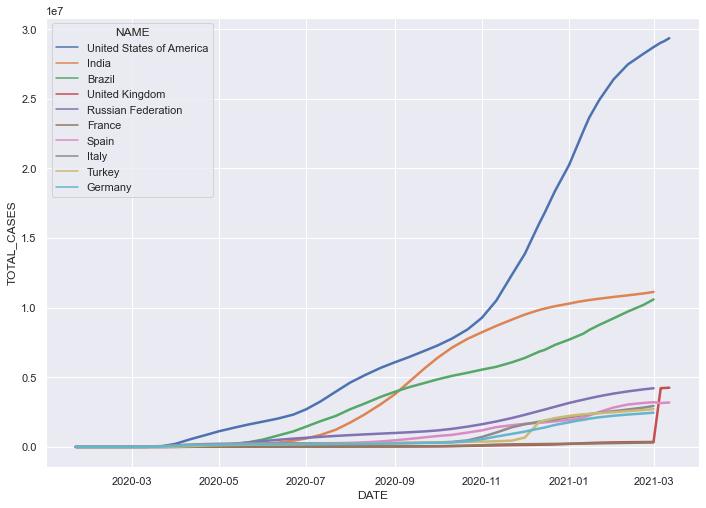

In [13]:
df_q1 = df_casos.loc[df_casos['NAME'].isin(top_casos), :]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="DATE", y="TOTAL_CASES", hue="NAME", ci=None, linewidth = 2.5, data=df_q1)

# 2) Panorama diário de quantidade de mortes de COVID-19 dos 10 países do mundo com números.

<AxesSubplot:xlabel='DATE', ylabel='TOTAL_CASES'>

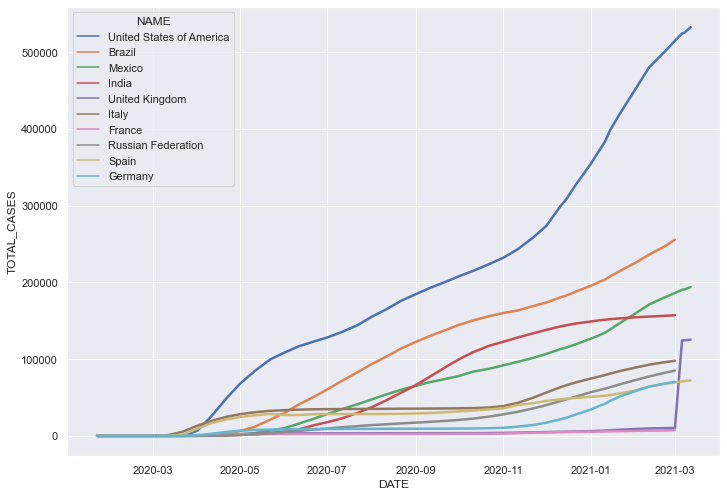

In [14]:
df_q2 = df_mortes.loc[df_mortes['NAME'].isin(top_mortes), :]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="DATE", y="TOTAL_CASES", hue="NAME", ci=None, linewidth = 2.5, data=df_q2)

# 3) Total de mortes por COVID-19 dos 10 países do mundo com maiores números.

In [19]:
df_q3 = df_mortes.loc[(df_mortes['NAME'].isin(top_mortes)), ['NAME', 'TOTAL_CASES']].drop_duplicates(subset=['NAME']).head(10).reset_index()
del df_q3['DATE']
df_q3

NAME  TOTAL_CASES
0  United States of America       532590
1                    Brazil       255720
2                    Mexico       193851
3                     India       157248
4            United Kingdom       125343
5                     Italy        97945
6                    France        86347
7        Russian Federation        85025
8                     Spain        72258
9                   Germany        70514

# 4) Total de casos confirmados por COVID-19 dos 10 países do mundo com maiores números.

In [20]:
df_q4 = df_casos.loc[(df_casos['NAME'].isin(top_casos)), ['NAME', 'TOTAL_CASES']].drop_duplicates(subset=['NAME']).head(10).reset_index()
del df_q4['DATE']
df_q4

NAME  TOTAL_CASES
0  United States of America     29347338
1                     India     11124527
2                    Brazil     10587001
3            United Kingdom      4248286
4        Russian Federation      4209850
5                    France      3736390
6                     Spain      3204531
7                     Italy      2938371
8                    Turkey      2711479
9                   Germany      2455569